You can find the Article Here: https://www.datainsightonline.com/post/machine-learning-concepts-classification-and-regression-trees-with-scikit-learn

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

In [2]:
SEED = 123
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = iris.data[:, 2:] # petal length and width
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 ,random_state=SEED)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


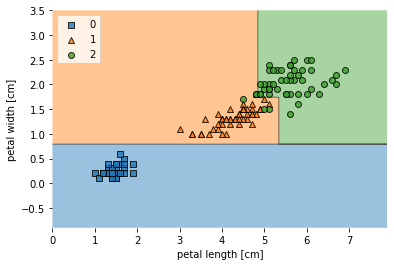

In [5]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,y_combined,clf=tree,legend=2)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [6]:
dot_data = export_graphviz(tree,filled=True,rounded=True,class_names=['Setosa','Versicolor','Virginica'],
                           feature_names=['petal length','petal width'],out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [7]:
y_pred= tree.predict(X_test)

In [8]:
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)

0.9333333333333333


In [9]:
prediction = tree.predict([[1.6,2]])
print(prediction)

[1]


In [10]:
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


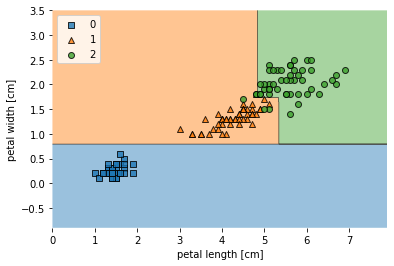

In [11]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,y_combined,clf=tree_reg,legend=2)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [12]:
dot_data = export_graphviz(tree_reg,filled=True,rounded=True,class_names=['Setosa','Versicolor','Virginica'],
                           feature_names=['petal length','petal width'],out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_reg.png')

True

In [13]:
y_pred= tree_reg.predict(X_test)

In [14]:
mse= MSE(y_test,y_pred)
print(mse)

0.05


In [15]:
import pandas as pd
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
0,1,1.0
1,2,2.0
2,2,2.0
3,1,1.0
4,0,0.0
5,2,1.5
6,1,1.0
7,0,0.0
8,0,0.0
9,1,1.0
